In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from skimage import io
import pandas
import os
import sys
from textwrap import wrap
import math
import numpy as np

sys.path.insert(0, os.path.join(os.path.split(os.getcwd())[0], "classes"))
from Parameters import Parameters

## Montage kymographs

#### Usage
* Make a new folder with the experiment (or comparison) title as its name. 
* Put the (dated) output folders from analyses of interest into the experiment folder
* Write the path to the folder in the "experiment folder" variable immediately below, taking care to use \\\ to separate folders
* Figure sub-titles are taken from the original data path by default - to override these, change the "condition_names" variable from None to a list of names, e.g. \["control", "condition 1", "condition 2"\]
* Output figures can be saved by right clicking on the figure and saving as a PNG to the local machine

C:\Users\dougk\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2128: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


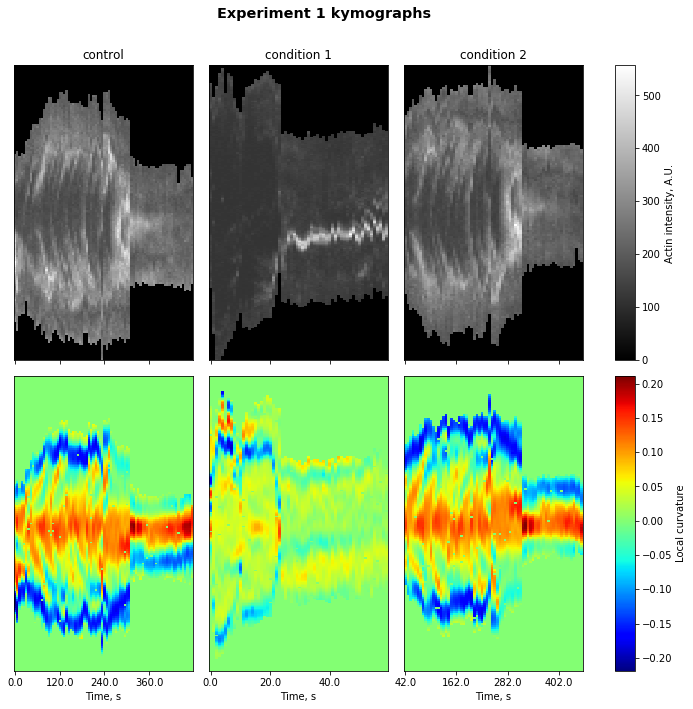

In [23]:
experiment_folder = "D:\\data\\Inverse blebbing\\Experiment 1"
condition_names = None;
#condition_names = ["control", "condition 1", "condition 2"]

# load and plot kymographs
actin_kyms = []; 
curvature_kyms = [];
paramses = [];
subtitles = [];
experiment_title = os.path.basename(experiment_folder);
for idx, subfolder in enumerate(os.listdir(experiment_folder)):
    actin_kyms.append(io.imread(os.path.join(experiment_folder, subfolder, "normalised position Actin kymograph.tif")));
    curvature_kyms.append(io.imread(os.path.join(experiment_folder, subfolder, "normalised position curvature kymograph.tif")));
    params = Parameters();
    params.loadParametersFromJson(os.path.join(experiment_folder, subfolder, "parameters used.json"));
    paramses.append(params);
    if condition_names is None:
        subtitles.append(os.path.splitext(os.path.basename(params.input_image_path))[0]);
    else:
        subtitles.append(condition_names[idx]);
curv_lims = (min([im.min() for im in curvature_kyms]), max([im.max() for im in curvature_kyms]));
fig, axs = plt.subplots(ncols=len(actin_kyms), nrows=2, sharex='col', figsize=(3*len(curvature_kyms),10));
for idx in range(len(actin_kyms)):
    im1=axs[0][idx].imshow(actin_kyms[idx], plt.cm.gray, aspect='auto', interpolation=None);
    im2=axs[1][idx].imshow(curvature_kyms[idx], plt.cm.jet, vmin=curv_lims[0], vmax=curv_lims[1], aspect='auto', interpolation=None);
    axs[1][idx].set_xlabel("Time, " + paramses[idx].interval_unit);
    axs[0][idx].set_yticks([]);
    axs[1][idx].set_yticks([]);

# handle presentation
plt.tight_layout()
fig.subplots_adjust(top=0.90, right=0.9);
cbar_ax1 = fig.add_axes([0.95, axs[0][len(actin_kyms)-1].get_position().y0, 0.03, (axs[0][len(actin_kyms)-1].get_position().y1 - axs[0][len(actin_kyms)-1].get_position().y0)])
cbar_ax2 = fig.add_axes([0.95, axs[1][len(actin_kyms)-1].get_position().y0, 0.03, (axs[1][len(actin_kyms)-1].get_position().y1 - axs[1][len(actin_kyms)-1].get_position().y0)])
fig.colorbar(im1, cax=cbar_ax1);
fig.colorbar(im2, cax=cbar_ax2);
cbar_ax1.set_ylabel("Actin intensity, A.U. ");
cbar_ax2.set_ylabel("Local curvature");

for idx in range(len(actin_kyms)):
    lbls = axs[1][idx].get_xticklabels();
    t_offs = 0;
    if paramses[idx].time_crop_start_end is not None:
        t_offs = float(paramses[idx].time_crop_start_end[0] * paramses[idx].frame_interval);
    newlbls = ([(t_offs + paramses[idx].frame_interval * float(l.get_text().replace("−","-"))) for l in lbls]);
    axs[1][idx].set_xticklabels(newlbls);
    axs[0][idx].set_title("\n".join(wrap(subtitles[idx], 30)));

plt.rc('figure', titlesize='x-large', titleweight='bold')
fig.suptitle(experiment_title + " kymographs")
plt.show();

## Montage curvature overlays

#### Usage
* Set up experiment folder as outlined above
* Write the path to the folder in the "experiment folder" variable immediately below, taking care to use \\ to separate folders
* Write the time points to display in the chosen_timepoints list immediately below. If the chosen time points don't exist in for the data, the closest possible time point will be used instead. If the chosen time point lies outside the range of data time points, the pane in the figure is left blank
* As above, figure sub-titles are taken from the original data path by default - to override these, change the "condition_names" variable from None to a list of names, e.g. \["control", "condition 1", "condition 2"\]
* Output figures can be saved by right clicking on the figure and saving as a PNG to the local machine

C:\Users\dougk\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2128: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


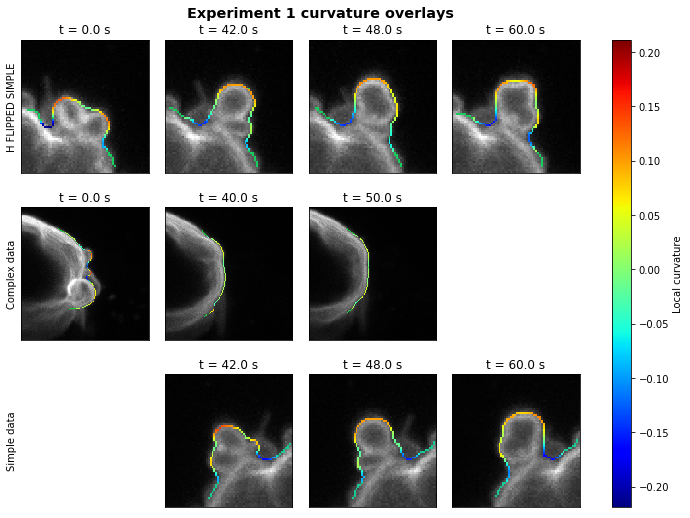

In [25]:
experiment_folder = "D:\\data\\Inverse blebbing\\Experiment 1"
chosen_timepoints = [0, 40, 50, 60];
condition_names = None;
#condition_names = ["control", "condition 1", "condition 2"]

ims = [];
raw_curvatures = [];
paramses = [];
subtitles = [];
# load and plot images
experiment_title = os.path.basename(experiment_folder);
for idx, subfolder in enumerate(os.listdir(experiment_folder)):
    ims.append(io.imread(os.path.join(experiment_folder, subfolder, "overlaid curvature.tif")));
    raw_curvatures.append(io.imread(os.path.join(experiment_folder, subfolder, "raw curvature.tif")));
    params = Parameters();
    params.loadParametersFromJson(os.path.join(experiment_folder, subfolder, "parameters used.json"));
    paramses.append(params);
    if condition_names is None:
        subtitles.append(os.path.splitext(os.path.basename(params.input_image_path))[0]);
    else:
        subtitles.append(condition_names[idx]);

curv_lims =  (min([raw_cs.min() for raw_cs in raw_curvatures]), max([raw_cs.max() for raw_cs in raw_curvatures]))
fig, axs = plt.subplots(ncols=len(chosen_timepoints), nrows=len(ims), figsize=(3*len(ims),2.5*len(ims)));
for imidx in range(len(ims)):
    t_offs = 0;
    if paramses[imidx].time_crop_start_end is not None:
        t_offs = float(paramses[idx].time_crop_start_end[0]) * paramses[idx].frame_interval;
    chosen_frames = [round((t - t_offs)/ paramses[imidx].frame_interval) for t in chosen_timepoints];
    #chosen_frames = [ch if ch < ims[imidx].shape[0] else ims[imidx].shape[0]-1 for ch in chosen_frames]; # 
    closest_timepoints = [fr * paramses[imidx].frame_interval + t_offs for fr in chosen_frames];
    chosen_frames = [ch if ((ch < ims[imidx].shape[0]) and (ch >= 0)) else float('nan') for ch in chosen_frames];
    #print("For " + subtitles[imidx] + ", available timepoints are: " + str([i * paramses[imidx].frame_interval + t_offs for i in range(len(ims[imidx]))]));
    #print("For " + subtitles[imidx] + ", timepoints are: " + str(closest_timepoints));
    #print("For " + subtitles[imidx] + ", frames are: " + str(chosen_frames));
    for fridx, fr in enumerate(chosen_frames):
        if not math.isnan(fr):
            cbw = math.ceil(0.95 * ims[imidx][fr].shape[0]);
            curv_pix = np.nonzero(raw_curvatures[imidx][fr]);
            for pixx, pixy in zip(curv_pix[0], curv_pix[1]):
                curv = raw_curvatures[imidx][fr][pixx][pixy];
                existing_val = ims[imidx][fr][pixx][pixy];
                #print("Existing RBG value = " + str(existing_val));
                curv_idx_8bit = int(round(255 * (curv - curv_lims[0]) / (curv_lims[1] - curv_lims[0])));
                r, g, b, _ = cm.jet(curv_idx_8bit);
                #print("Curvature = " + str(curv));
                #print("Scaled index = " + str(curv_idx_8bit));
                #print("RGB value = " + str((int(round(255*r)), int(round(255*g)), int(round(255*b)))));
                ims[imidx][fr][pixx][pixy][0] = int(round(255*r));
                ims[imidx][fr][pixx][pixy][1] = int(round(255*g));
                ims[imidx][fr][pixx][pixy][2] = int(round(255*b));
            axs[imidx][fridx].imshow(ims[imidx][fr][:, :cbw, :]);
            axs[imidx][fridx].set_title("t = " + str(closest_timepoints[fridx]) + " s");
        else:
            #axs[imidx][fridx].set_visible(False);
            axs[imidx][fridx].imshow(ims[imidx][0][:, :cbw, :], alpha=0);
            axs[imidx][fridx].set_frame_on(False);
            #if fridx == 0:
                #axs[imidx][fridx].set_ylabel("\n".join(wrap(subtitles[imidx], 30)));
        axs[imidx][fridx].set_xticks([]);
        axs[imidx][fridx].set_yticks([]);
        if fridx == 0:
            axs[imidx][fridx].set_ylabel("\n".join(wrap(subtitles[imidx], 30)));
#print(ims[0][0].shape)
#axs[0][0].imshow(ims[0][0])

plt.tight_layout()
fig.subplots_adjust(top=0.95, right=0.9, hspace=0);
cmap = plt.get_cmap('jet');
norm = colors.Normalize(vmin=curv_lims[0],vmax=curv_lims[1]);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm);
sm.set_array([]);
cbar_ax1 = fig.add_axes([0.95, axs[len(ims)-1][len(chosen_timepoints)-1].get_position().y0, 0.03, (axs[0][len(chosen_timepoints)-1].get_position().y1 - axs[len(ims)-1][len(chosen_timepoints)-1].get_position().y0)])
fig.colorbar(sm, cax=cbar_ax1);
cbar_ax1.set_ylabel("Local curvature");
plt.rc('figure', titlesize='x-large', titleweight='bold');
fig.suptitle(experiment_title + " curvature overlays");